___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

## Unsupervised Image Clustering

### Cluster the Olivetti Faces Dataset
- The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces
- Each image is of a different person
- Each image is of a different pose
- Each image is flattened into a 4096-dimensional vector

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [4]:
from sklearn import datasets

olivetti = datasets.fetch_olivetti_faces()

# print(olivetti.DESCR)

olivetti.data.shape, olivetti.images.shape
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

k_max = 100

scores = []
for k in tqdm(range(2, k_max)):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(olivetti.data)
    score = silhouette_score(olivetti.data, kmeans.labels_)
    scores.append(score)

100%|██████████| 98/98 [06:06<00:00,  3.74s/it]


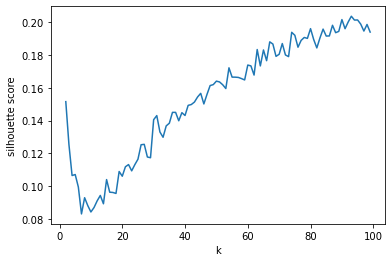

93

In [10]:
# plot the scores
import matplotlib.pyplot as plt

plt.plot(range(2, k_max), scores)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

# find the best k
scores.index(max(scores)) + 2 # this could be local maxima

In [14]:
# make the final clustering
best_k = scores.index(max(scores)) + 2
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(olivetti.data)

KMeans(n_clusters=93, random_state=0)

cluster 0
size 2
average image


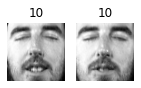

cluster 1
size 3
average image


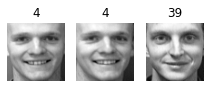

cluster 2
size 7
average image


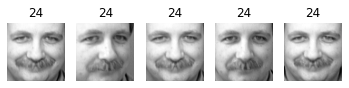

cluster 3
size 4
average image


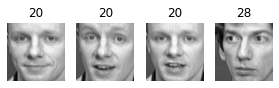

cluster 4
size 5
average image


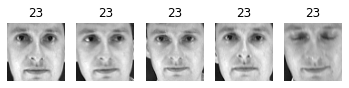

cluster 5
size 9
average image


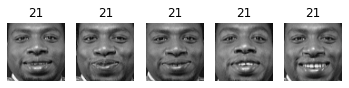

cluster 6
size 6
average image


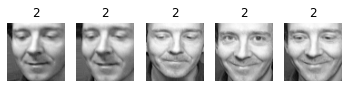

cluster 7
size 4
average image


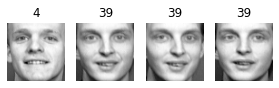

cluster 8
size 10
average image


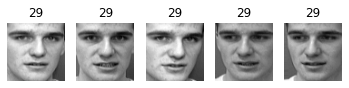

cluster 9
size 5
average image


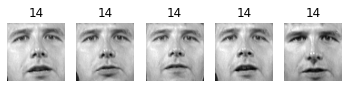

cluster 10
size 5
average image


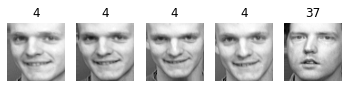

cluster 11
size 5
average image


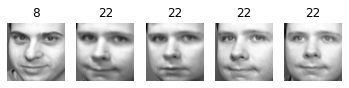

In [27]:
# count individual clusters
from collections import Counter
import numpy as np

X = olivetti.data
y = olivetti.target

labels = kmeans.labels_
len(labels)

# print(Counter(labels))
# print(labels)

for index, cluster_id in enumerate(np.unique(labels)):
    print('cluster', cluster_id)
    print('size', Counter(labels)[cluster_id])
    print('average image')
    
    # plot each image
    faces = X[labels == cluster_id]
    targets = y[labels == cluster_id]
    for i in range(min(5, len(faces))):
        plt.subplot(1, 5, i + 1)
        plt.imshow(faces[i].reshape(64, 64), cmap='gray')
        plt.axis('off')
        plt.title(targets[i])
    plt.show()

    if index>10:
        break


In [25]:
labels

array([10, 10])

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
